In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## fix delta time
dt=1
## fix spot price, mu, and sigma
mu=0
sigma=0.005

## fix random seed
np.random.seed(0)

## fix number of time steps for simulated prices
nTimeStep = 1000

In [3]:
############################################################################
### function to load historical prices and create lookup table
############################################################################
from Historic_Crypto import HistoricalData
def getAllPrice(_pair,_freq,_start,_end):
    dat = HistoricalData(_pair,_freq,_start,_end).retrieve_data()
    dat = pd.DataFrame(dat).reset_index(drop=False)
    #### rename columns
    dat.rename(columns = {
        "time": "sampledTime",
        "close": "indexPrice",
    }, inplace = True)
    #### drop exta columns
    dat.drop(["low", "high", "open","volume"], axis = 1, inplace = True)

    return dat

dfSampledPrice = getAllPrice('AVAX-USD',3600,'2022-01-01-00-00','2022-03-20-00-00')
histPrice = np.array(dfSampledPrice['indexPrice'])
histTime = len(histPrice)

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'AVAX-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2022-01-01T00:00:00
Provisional End: 2022-01-13T12:00:00
Data for chunk 1 of 7 extracted
Provisional Start: 2022-01-13T12:00:00
Provisional End: 2022-01-26T00:00:00
Data for chunk 2 of 7 extracted
Provisional Start: 2022-01-26T00:00:00
Provisional End: 2022-02-07T12:00:00
Data for chunk 3 of 7 extracted
Provisional Start: 2022-02-07T12:00:00
Provisional End: 2022-02-20T00:00:00
Data for chunk 4 of 7 extracted
Provisional Start: 2022-02-20T00:00:00
Provisional End: 2022-03-04T12:00:00
Data for chunk 5 of 7 extracted
Provisional Start: 2022-03-04T12:00:00
Provisional End: 2022-03-17T00:00:00
Data for chunk 6 of 7 extracted
Provisional Start: 2022-03-17T00:00:00
Provisional End: 2022-03-29T12:00:00
Data for chunk 7 of 7 extracted

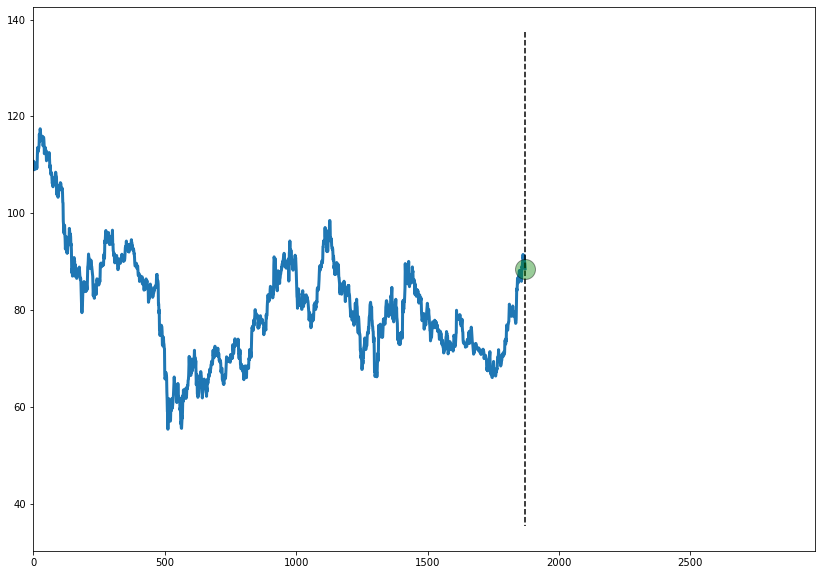

In [4]:
############################################################
## This cell has code to plot historical data
############################################################

## plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)
plt.show()

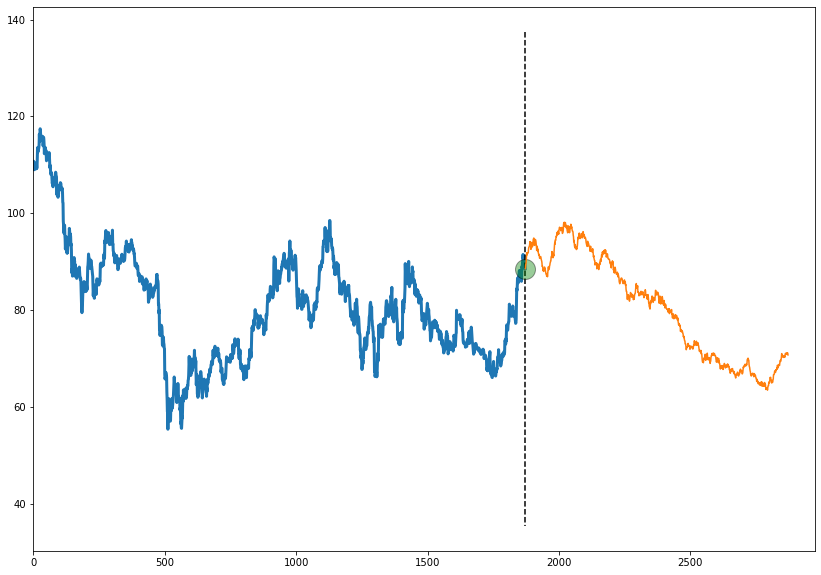

In [5]:
############################################################
## This cell has code to sample 1 potential future path
############################################################

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=1

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:])

plt.show()

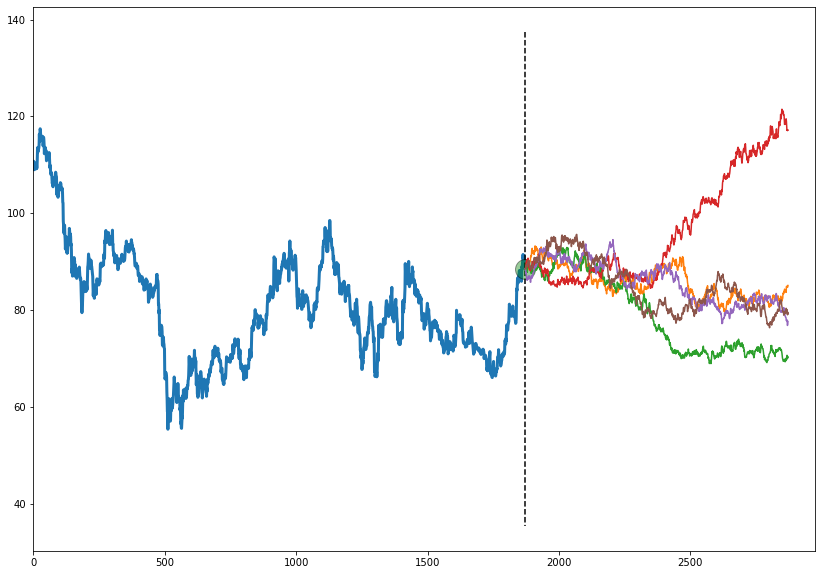

In [6]:
############################################################
## This cell has code to sample 5 potential future paths
############################################################

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=5

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:])

plt.show()

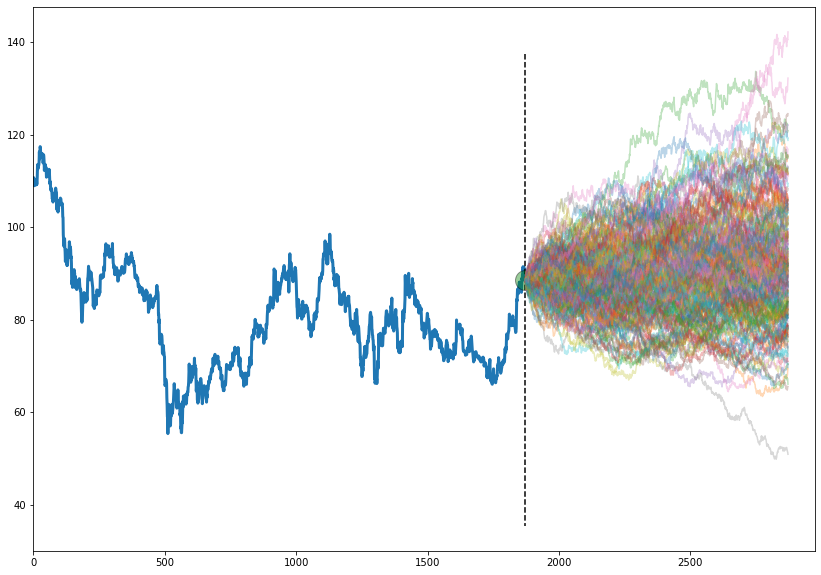

In [7]:
############################################################
## This cell has code to sample 200 potential future paths
############################################################


## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)

    
plt.show()

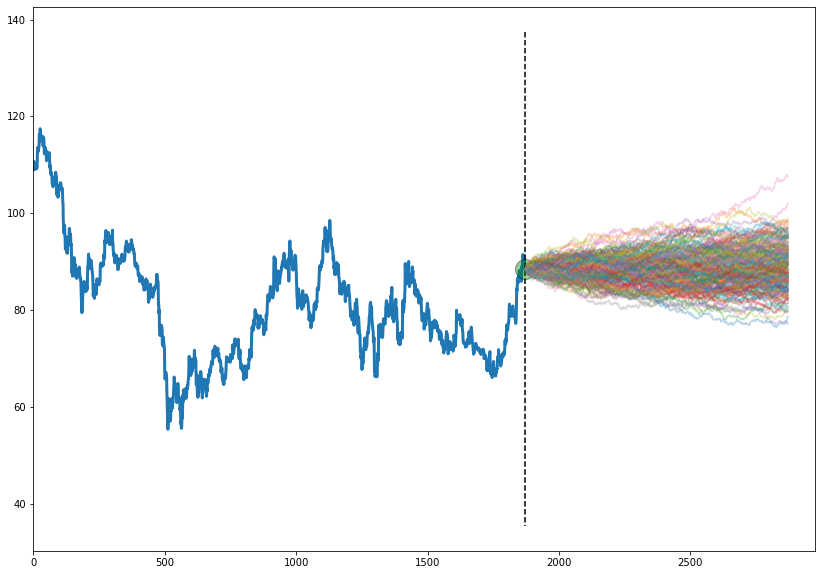

In [8]:
############################################################
## This cell has code to sample paths with smaller sigma
############################################################

newSigma = 0.33*sigma

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + newSigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)

plt.show()

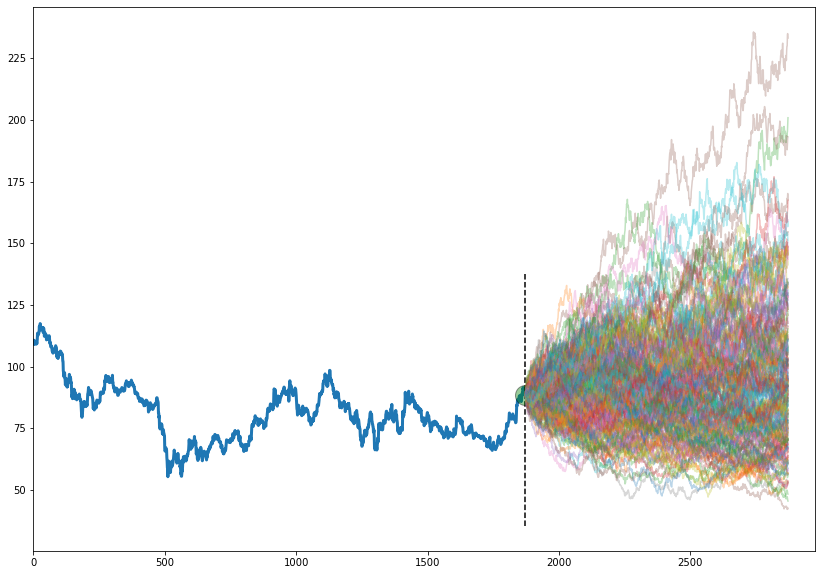

In [9]:
############################################################
## This cell has code to sample paths with larger sigma
############################################################

newSigma = 2*sigma

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + newSigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)

plt.show()

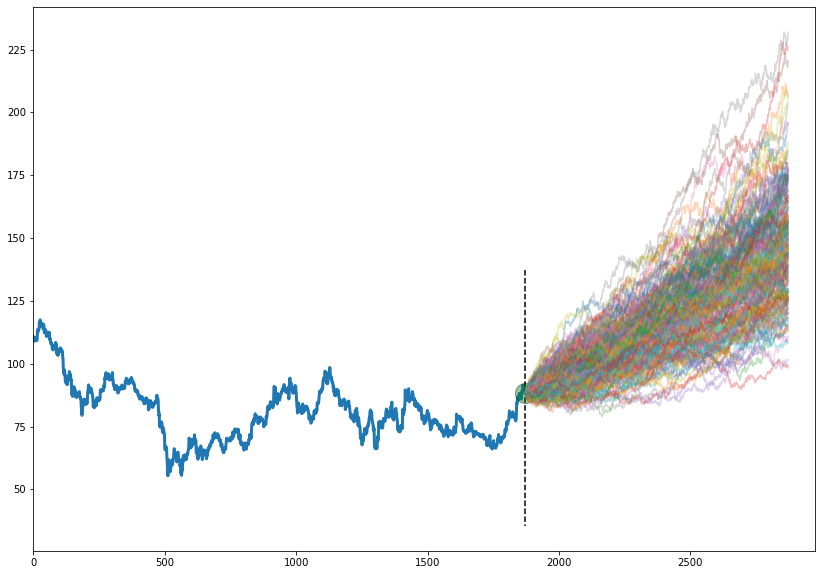

In [10]:
############################################################
## This cell has code to sample paths with positive mu
############################################################
newMu = 0.0005

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,newMu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)

plt.show()

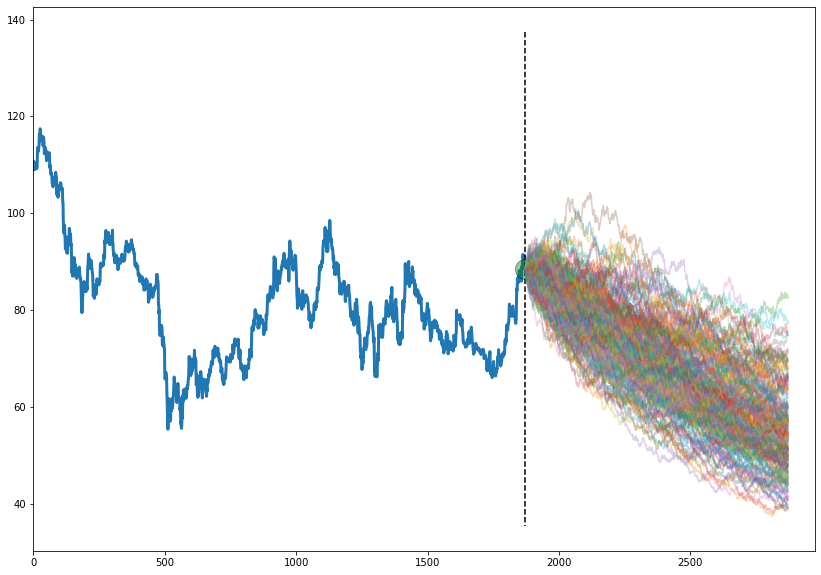

In [11]:
############################################################
## This cell has code to sample paths with negative mu
############################################################
newMu = -0.0005

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,newMu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample path
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)

plt.show()

length hist data = 1000, mu = 0.00021205216351213716, std = 0.013099865031922963
chance of being above 150 = 0.2
chance of being below 60 = 0.06


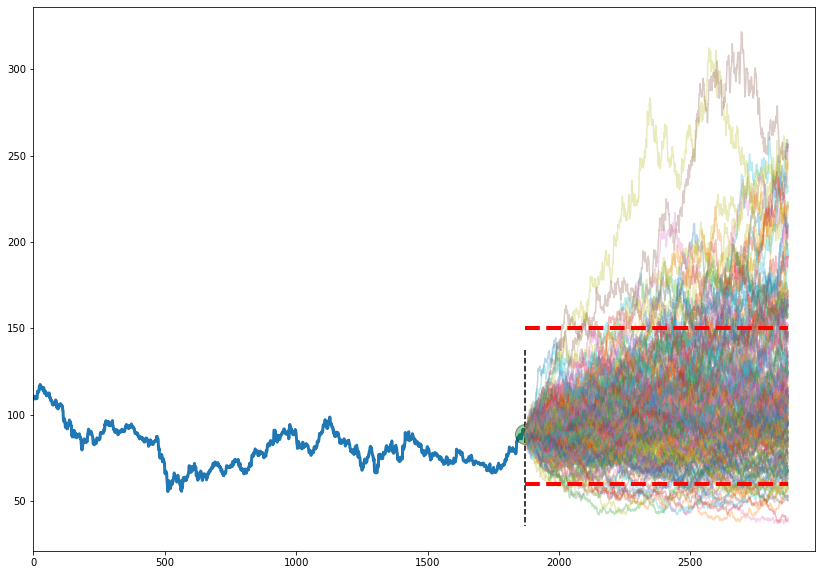

In [12]:
############################################################
## This cell has code to estimate mu and sigma from historical data
## and to calculate the chance of being above or below threshold prices
############################################################


############################################################################
### function to get historical prices for mu and sigma
############################################################################
def getHistPrice(dfTemp,ts,sampleFreqMin,numObservations):
    dfHistSampleTime = pd.DataFrame()
    dfHistSampleTime['histTs'] = pd.date_range(end = pd.Timestamp(ts),\
                                               periods=numObservations,\
                                               freq=f'{sampleFreqMin} min')
    _dfHistPrice = pd.merge_asof(dfHistSampleTime,dfTemp,\
                                 left_on='histTs',right_on='sampledTime')
    _dfHistPrice = _dfHistPrice[ _dfHistPrice['indexPrice'].notnull() ]
    _dfHistPrice = _dfHistPrice.reset_index(drop=True)
    return _dfHistPrice

## get historical data from function
dfHist = getHistPrice(dfSampledPrice,pd.Timestamp('2022-03-20 00:00:00'),60,1000)
histPriceData = np.array(dfHist['indexPrice'])
## calculate mu and sigma based on historical data
sigma = np.std(histPriceData[1:] / histPriceData[:-1] - 1)
mu = np.mean(histPriceData[1:] / histPriceData[:-1] - 1)
print(f'length hist data = {len(histPriceData)}, mu = {mu}, std = {sigma}')

## start new figure and plot historical data
plt.figure(figsize=(14,10))
plt.plot(histPrice,linewidth=3)
plt.plot([histTime,histTime],[np.max(histPrice)+20,np.min(histPrice)-20],\
         color='black',linestyle='--')
plt.plot([histTime],histPrice[-1],linestyle='',\
         marker='o',markersize=20,color='green',markeredgecolor='black',alpha=0.4)
plt.xlim(0,histTime+nTimeStep+100)

## fix starting price of new paths as end of hist data
spot=histPrice[-1]
nSamples=200

## generate new sample paths based on real estimate of mu and sigma
logPrice = np.zeros((nSamples,nTimeStep))
logPrice[:,0] = np.full(nSamples,np.log(spot))
for i in range(nTimeStep-1):
    logPrice[:,i+1] = logPrice[:,i] + np.full(nSamples,mu)*dt \
    + sigma*np.sqrt(dt)*np.random.normal(loc=0, scale=1, size=nSamples)

price = np.exp(logPrice)

## plot new sample paths
for path in range(nSamples):
    plt.plot(range(histTime,histTime+nTimeStep),price[path,:],alpha=0.3)


## select threshold level that you are interested in and plot
thresholdAbove = 150
plt.plot([histTime,histTime+nTimeStep],[thresholdAbove,thresholdAbove]\
         ,linestyle='--',color='red',linewidth=4)
    
aboveMask = (price[:,-1] > thresholdAbove)
probAbove = np.count_nonzero(aboveMask) / len(aboveMask)
print(f'chance of being above {thresholdAbove} = {probAbove}')


## select threshold level that you are interested in and plot
thresholdBelow = 60
plt.plot([histTime,histTime+nTimeStep],[thresholdBelow,thresholdBelow]\
         ,linestyle='--',color='red',linewidth=4)
    
belowMask = (price[:,-1] < thresholdBelow)
probBelow = np.count_nonzero(belowMask) / len(belowMask)
print(f'chance of being below {thresholdBelow} = {probBelow}')
    
plt.show()